In [1]:
import phasenet.model as M
import phasenet.zernike as Z
import sys
from collections import OrderedDict
from csbdeep.utils import normalize

Using TensorFlow backend.
/Users/dsaha/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


### Load model

In [2]:
basedir = '/Users/dsaha/Desktop/'
name = '15_05_2020_18_43_51_berkley_50planes'

In [3]:
model = M.PhaseNet(None, name=name, basedir=basedir)

Loading network weights from 'weights_best.h5'.


### Load Data

In [4]:
data_path = '/Users/dsaha/Desktop/phase_net_data_versions/phase_net_data/ji/random_mode/modes_5-10/'

In [5]:
images = OrderedDict()
files = glob.glob(data_path+'/images/*.tif')
names = [f[f.rfind('/')+1 : f.rfind('.tif')] for f in files]
for i,n in enumerate(names):
    images[n] = tifffile.imread(files[i])

In [6]:
print(images['Random_1'].shape)

(50, 50, 50)


## Predict

In [7]:
random_mode_result = OrderedDict()
zerns_ansi = [3,5,6,7,8,9,10,11,12,13,14]
for key in images:
    data = images[key]
    if data.shape == (model.keras_model.input_shape[1],
                      model.keras_model.input_shape[2],
                      model.keras_model.input_shape[3]):
        data = normalize(data)
        data = np.expand_dims(data,axis=-1)
        data = np.expand_dims(data,axis=0)
        _p = model.keras_model.predict(normalize(data))
        _p = dict(zip(zerns_ansi,_p[0]))
        
        random_mode_result[key] = _p

## Comparision with ground truth

#### Load GT

In [8]:
gt_path = data_path+'/gt/'

In [9]:
random_mode_gt = OrderedDict()
zerns_noll = [5,6,7,8,9,10,11,12,13,14,15]
files = glob.glob(gt_path + '*.npy')
names = [f[f.rfind('/')+1 : f.rfind('.npy')] for f in files]
for i,n in enumerate(names):
    _p = np.load(files[i])
    _p = dict(zip(zerns_noll,_p))
    random_mode_gt[n] = _p

#### Plot

Random_49


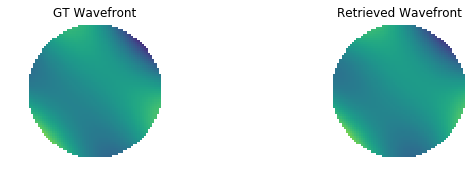

Random_48


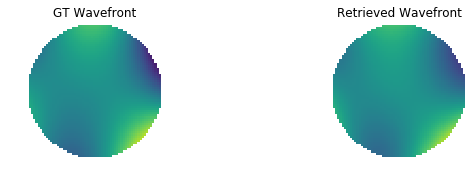

Random_38


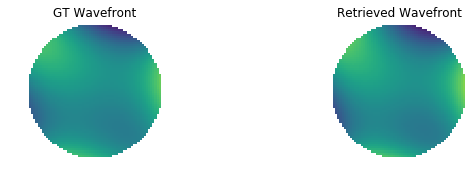

Random_10


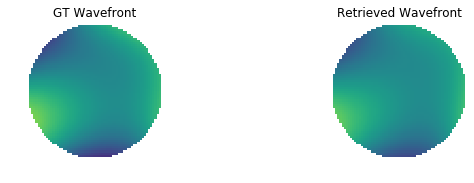

Random_11


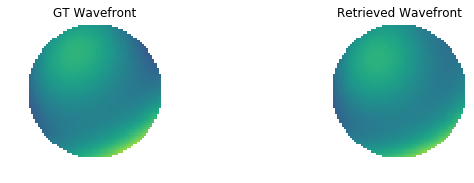

Random_39


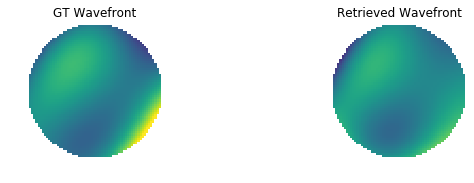

Random_13


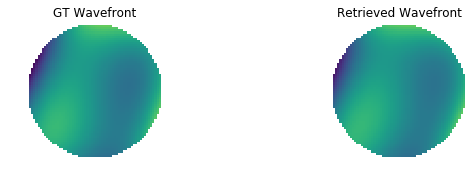

Random_9


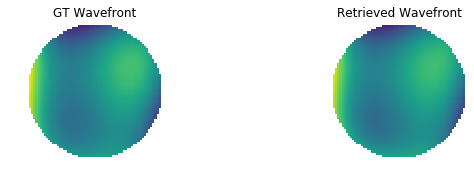

Random_8


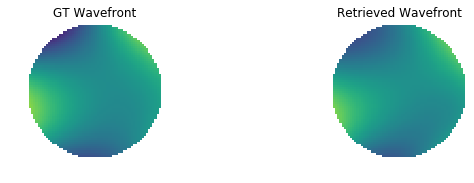

Random_12


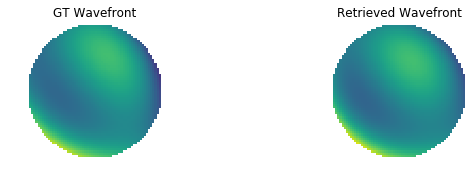

Random_16


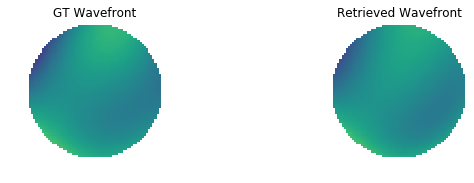

Random_17


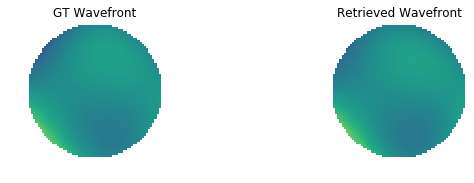

Random_15


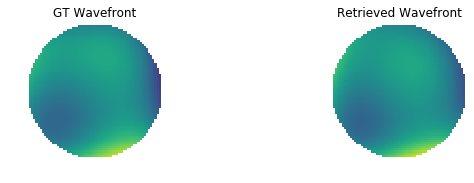

Random_29


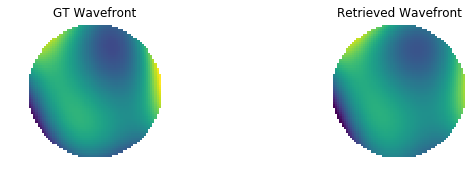

Random_28


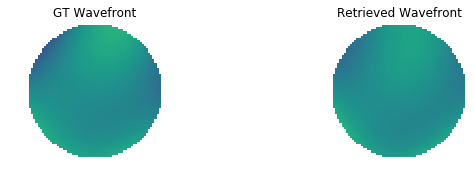

Random_14


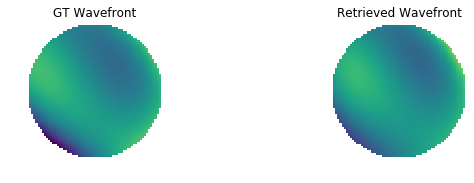

Random_19


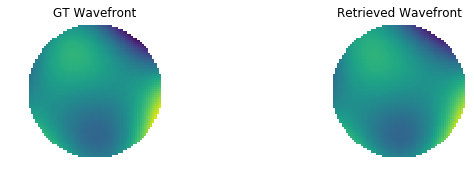

Random_31


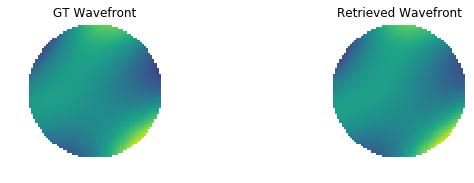

Random_25


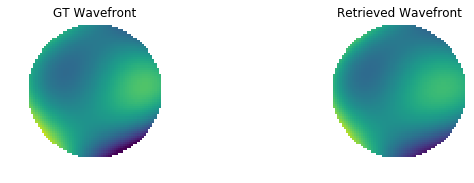

Random_3


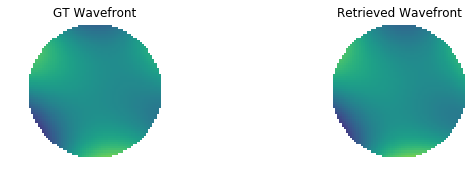

Random_2


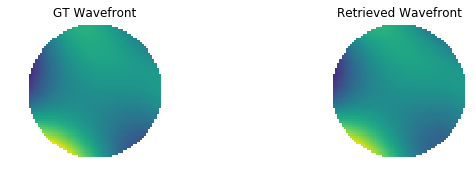

Random_24


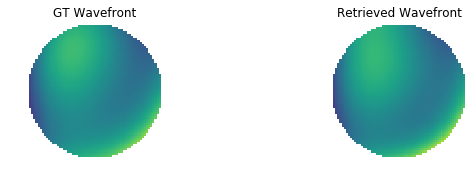

Random_30


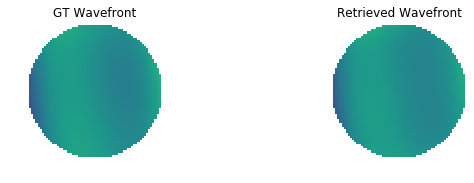

Random_18


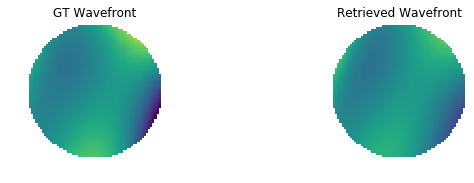

Random_26


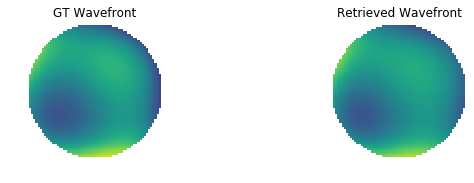

Random_32


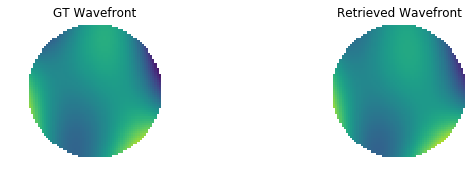

Random_1


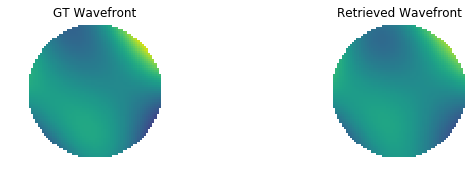

Random_33


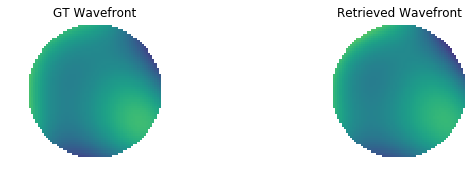

Random_27


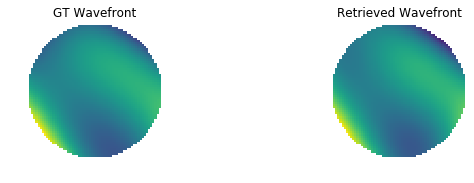

Random_23


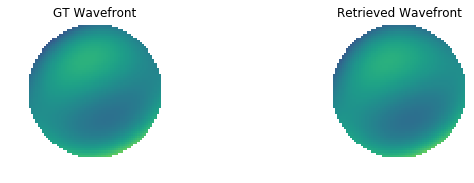

Random_37


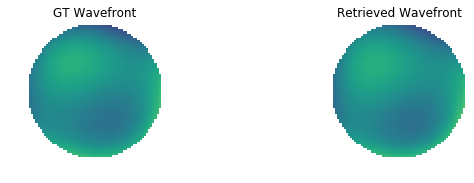

Random_5


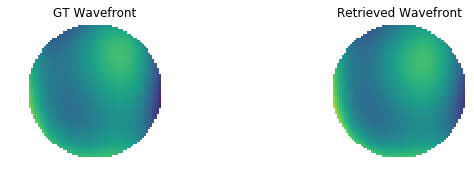

Random_4


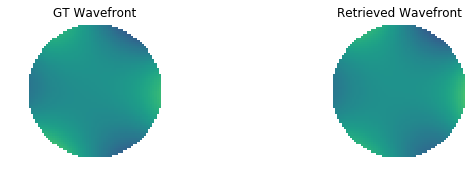

Random_36


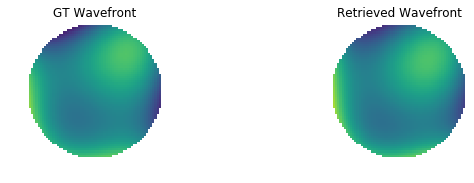

Random_22


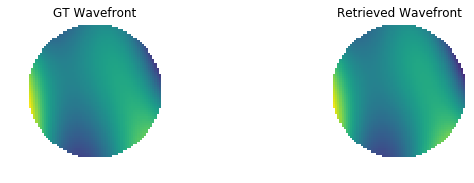

Random_34


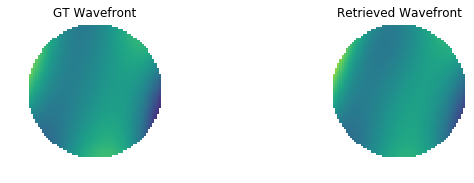

Random_20


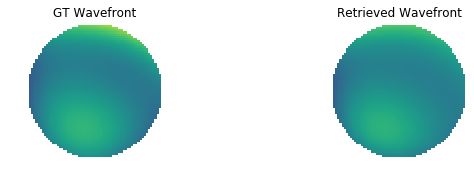

Random_6


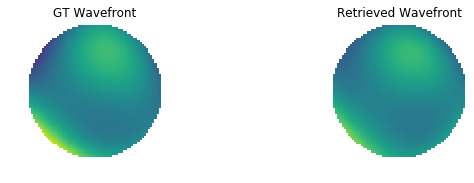

Random_7


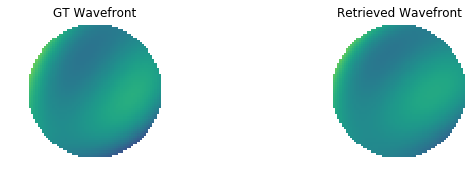

Random_21


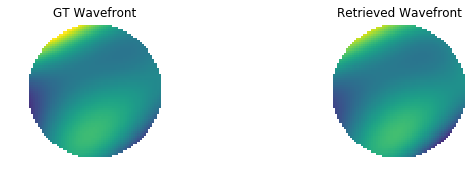

Random_35


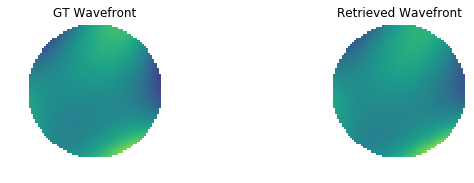

Random_46


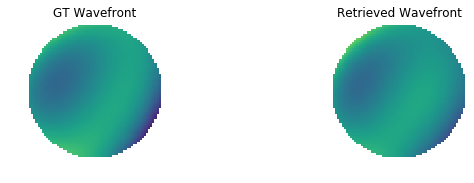

Random_47


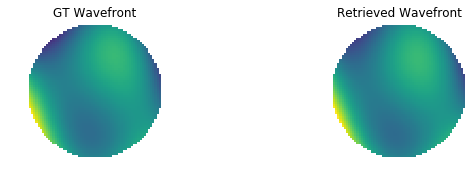

Random_45


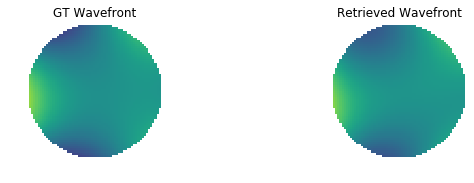

Random_50


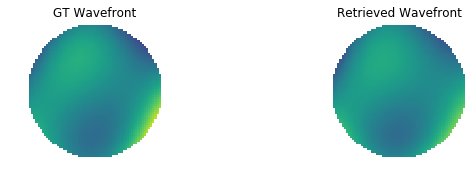

Random_44


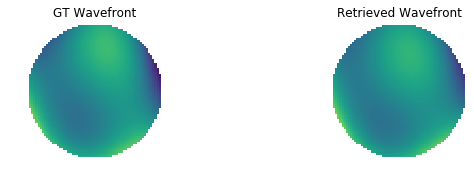

Random_40


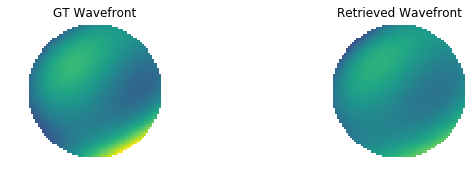

Random_41


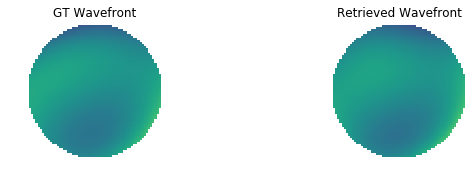

Random_43


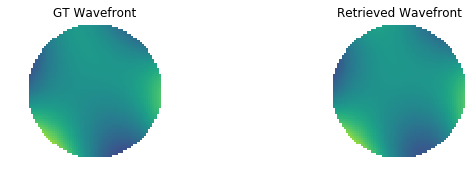

Random_42


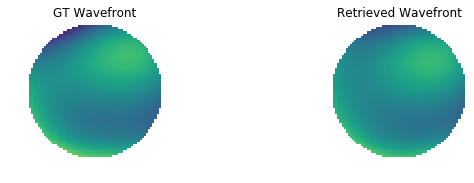

In [10]:
for key in random_mode_result:
    print(key)
    p=random_mode_result[key]
    p_wavefront = Z.ZernikeWavefront(p, order='ansi') 

    num = int(key[key.rfind('_')+1:])
    gt = random_mode_gt['Random_%d'%num]
    gt_wavefront = Z.ZernikeWavefront(gt, order='noll') 

    plt.figure(figsize=(10,2.5))
    plt.subplot(1,2,1)
    plt.title("GT Wavefront")
    plt.imshow(gt_wavefront.polynomial(64),clim=(-0.5,0.5))
    plt.axis('OFF')
    plt.subplot(1,2,2)
    plt.title("Retrieved Wavefront")
    plt.imshow(p_wavefront.polynomial(64),clim=(-0.5,0.5))
    plt.axis('OFF')
    plt.show()
None;